# Specific Heats

This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 2 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated 3 February 2020.

The objective of this tutorial Notebook is to show how to access and work with specific heats of individual ideal-gas species and of ideal-gas mixtures using Cantera's `Solution()` object. Some additional NumPy operations are introduced, and some additional features that can be used in generating x-y plots are demonstrated, beyond what has been shown in earlier tutorial Notebooks. We will define the gas mixture using gri30.cti.

The reader should be familiar with the material in the previous Notebook (2_1_Mass_moles_molecular_weights_mixtures) before working through this Notebook.

## 1. General comments on specific heats

The "specific heat" or "heat capacity" of a substance is a measure of how much energy must be added or removed to change the temperature of the substance by a given amount. The Cantera units of heat capacity are J/kg-K (on a per-unit-mass basis) or J/kmol-K (on a molar basis). The higher the numerical value of the heat capacity, the more heat that must be added or removed to change the temperature by a specified amount.

For a simple compressible substance, two heat capacities are conventionally defined and used: the constant-volume specific heat $c_v$ and the constant-pressure specific heat $c_p$. For a single-species ideal gas, $c_v$ and $c_p$ are (at most) functions of temperature. 

For mixtures, mixture-averaged specific heats are defined as appropriately weighted averages over the individual species specific heats. For example, the mixture specific heats $c_v$ and $c_p$ in Joules per kilogram of mixture per Kelvin for a mixture containing $N_{spec}$ individual species are given by:

$$ c_v = \sum _ {i=1} ^ {N_{spec}} \bigl( Y _ i c_{v,i} \bigr) $$

and

$$ c_p = \sum _ {i=1} ^ {N_{spec}} \bigl( Y _ i c_{p,i} \bigr) $$

where $i$ is a species index, $ Y_i $ is the mass fraction of species $i$ in the mixture, and $c_{v,i}$ and $c_{p,i}$ are the individual species constant-volume and constant-pressure specific heats (in J/kg-K), respectively. The corresponding expressions in terms of molar quantities are:

$$ \overline c_v = \sum _ {i=1} ^ {N_{spec}} \bigl( \chi _ i \overline c_{v,i} \bigr) $$

and

$$ \overline c_p = \sum _ {i=1} ^ {N_{spec}} \bigl( \chi _ i \overline c_{p,i} \bigr) $$

where $ \chi _ i $ is the mole fraction of species $i$ in the mixture, and $\overline c_{v,i}$ and $\overline c_{p,i}$ are the individual species constant-volume and constant-pressure specific heats (in J/kmol-K), respectively. 

The numerical values of the mass-based and molar specific heats for an individual species or for a mixture are related simply by the molecular weight of the species or mixture. For example, $ c_{p,i} = \overline c_{p,i} / MW_i $ for a species $i$, or $ c_{p} = \overline c_{p} / MW $ for a mixture.

Formal definitions of specific heats, interpretations of specific heats in terms of internal degrees of freedom of molecules, additional relationships involving specific heats, and the temperature dependence of specific heats are discussed in Chapter 2 of Turns 4th ed. Additional discussion and examples are presented in the remainder of this Notebook.

## 2. Individual species specific heats

Some initial examples of working with species specific heats were included in an earlier tutorial Notebook: Getting_started_with_Cantera. Here we will start by reproducing and discussing the equivalent of Figure 2.2 in Turns 4th ed.: the temperature dependence of molar specific heats for several species of interest in hydrocarbon-air combustion. We will compare molar-based species specific heats with mass-based species specific heats. We will look at the specific heats for some more complex molecules. And we will review the relationships among specific heats, gas constants, and molecular weights.

In [1]:
# access modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# report Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define an ideal-gas mixture named "gas1" using Cantera's "Solution" object and GRI-Mech 3.0
gas1 = ct.Solution('gri30.cti')

# show all available attributes of "gas1", for future reference
dir(gas1)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

### 2.1 Mole-based constant-pressure specific heats of several species as functions of temperature

As we have seen earlier, the attribute [`partial_molar_cp`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.partial_molar_cp) is an array of the species molar specific heats (J/kmol-K) at the current mixture temperature.

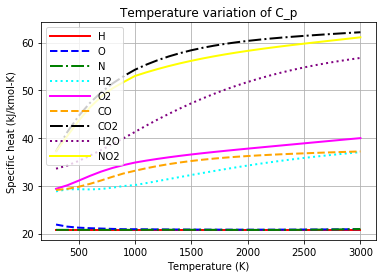

In [3]:
# specify the temperature range and temperature increment for plotting
tmin = gas1.min_temp
tmax = gas1.max_temp + 1.
delt = 100.

# define and initialize an array that holds the temperature values at which the species specific heats are to be computed
temp = np.arange(tmin,tmax,delt)

# nt is the total number of temperature values at which the species specific heats are to be computed
nt   = len(temp)

# define and initialize arrays for individual species specific heats
# include all species shown in Figure 2.2 of Turns 4th ed.
# here H2O refers to water vapor (versus liquid water), and H2O is treated as an ideal gas
cp_H   = np.zeros(nt)
cp_O   = np.zeros(nt)
cp_N   = np.zeros(nt)
cp_H2  = np.zeros(nt)
cp_O2  = np.zeros(nt)
cp_CO  = np.zeros(nt)
cp_CO2 = np.zeros(nt)
cp_H2O = np.zeros(nt)
cp_NO2 = np.zeros(nt)

# fill the species specific heat arrays
# here we divide the Cantera specific heat values by 1000 J/kJ, to give the results in kJ/kmol-K
# for ideal gases, specific heats are independent of pressure
# the species specific heats reported by "partial_molar_cp" do not depend on the current composition
#   of gas1

for i , T in enumerate(temp):
    gas1.TP   = T, None  # set the mixture temperature
    cp_H[i]   = gas1.partial_molar_cp[gas1.species_index('H')  ] / 1000.
    cp_O[i]   = gas1.partial_molar_cp[gas1.species_index('O')  ] / 1000.
    cp_N[i]   = gas1.partial_molar_cp[gas1.species_index('N')  ] / 1000.
    cp_H2[i]  = gas1.partial_molar_cp[gas1.species_index('H2') ] / 1000.
    cp_O2[i]  = gas1.partial_molar_cp[gas1.species_index('O2') ] / 1000.
    cp_CO[i]  = gas1.partial_molar_cp[gas1.species_index('CO') ] / 1000.
    cp_CO2[i] = gas1.partial_molar_cp[gas1.species_index('CO2')] / 1000.
    cp_H2O[i] = gas1.partial_molar_cp[gas1.species_index('H2O')] / 1000.
    cp_NO2[i] = gas1.partial_molar_cp[gas1.species_index('NO2')] / 1000.
    
# generate a plot, and save a copy to the current working directory
# note the use of "solid", "dashed", etc. for linestyles, in contrast to the method used in an earlier
#   Notebook to specify line dash patterns
# note also the explicit specification of line colors
fig, ax = plt.subplots()
ax.plot(temp,cp_H,  label='H',  color="red",    ls='solid',  lw=2)
ax.plot(temp,cp_O,  label='O',  color="blue",   ls='dashed', lw=2)
ax.plot(temp,cp_N,  label='N',  color="green",  ls='dashdot',lw=2)
ax.plot(temp,cp_H2, label='H2', color="cyan",   ls='dotted', lw=2)
ax.plot(temp,cp_O2, label='O2', color="magenta",ls='solid',  lw=2)
ax.plot(temp,cp_CO, label='CO', color="orange", ls='dashed', lw=2)
ax.plot(temp,cp_CO2,label='CO2',color="black",  ls='dashdot',lw=2)
ax.plot(temp,cp_H2O,label='H2O',color="purple", ls='dotted', lw=2)
ax.plot(temp,cp_NO2,label='NO2',color="yellow", ls='solid',  lw=2)

ax.set(xlabel='Temperature (K)',
       ylabel='Specific heat (kJ/kmol-K)',
       title ='Temperature variation of C_p')
ax.legend(handlelength=4,loc='best') # you can experiment with different legend locations
ax.grid(True)
fig.savefig("Cp_vs_T_9species.png")

This figure can be compared with Figure 2.2 in Turns 4th ed. Note the difference in the temperature range plotted, which was discussed earlier in Getting_started_with_Cantera. Over the temperature range that is plotted here, the numerical values here are consistent with those in Figure 2.2. Three distinct groups of species are evident, based on the number of internal degrees of freedom in each molecule, as discussed in Chapter 2 of Turns 4th ed.: monatomic molecules (H, O, N), diatomic molecules (H2, O2, CO), and triatomic molecules (CO2, H2O, NO2).

Let's take a closer look at the behavior for the three monatomic (single-atom) species:

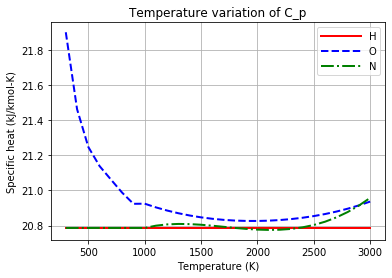

In [4]:
fig, ax = plt.subplots()
ax.plot(temp,cp_H,  label='H',  color="red",    ls='solid',  lw=2)
ax.plot(temp,cp_O,  label='O',  color="blue",   ls='dashed', lw=2)
ax.plot(temp,cp_N,  label='N',  color="green",  ls='dashdot',lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Specific heat (kJ/kmol-K)',
       title ='Temperature variation of C_p')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Cp_vs_T_3species.png")

The discontinuity in the O-atom value at approximately 900-1000 K is unphysical, as is the nonmonotonic variation in c_p for N-atom for temperatures between approximately 1000 K and 2500 K. These are consequences of the polynomial curve fits that are used to represent the temperature variation of the specific heats in gri30.cti. These discrepancies are small, and normally will not result in any significant errors in practical applications. However, in some cases, discontinuities in properties can cause problems in numerical calculations where iterative methods are used. 

To correct these behaviors, and to extend the temperature range over which the data can be used reliably (see Getting_started_with_Cantera), one might be tempted to update the thermochemical data in gri30.cti with more recent polynomial coefficients. In general, it is not recommended to change the thermochemical data that are provided with a reaction mechanism, as the rate coefficients in the mechanism are effectively "tuned" to work with the thermochemical data that are provided. In cases where it is found to be necessary to correct the discontinuities, various tools are available for that purpose. For example, see https://combustiontools.llnl.gov/.

Finally, we note that there is another version of the input data file for GRI Mech 3.0 that is provided with the standard Cantera installation (gri30_highT.cti), where the polynomial coefficients for the temperature-dependent thermodynamic properties are valid over a wider temperature range.

### 2.2 Mass-based constant-pressure specific heats of several species as functions of temperature

The mass-based constant-pressure specific heat (J/kg-K) is simply equal to the mole-based value (J/kmol-K) divided by the molecular weight (kg/kmol). As we have seen earlier, species molecular weights are accessible using the `molecular_weights` attribute:

In [5]:
# print the species molecular weights in kg/kmol
gas1.molecular_weights

array([ 2.01588,  1.00794, 15.9994 , 31.9988 , 17.00734, 18.01528,
       33.00674, 34.01468, 12.011  , 13.01894, 14.02688, 14.02688,
       15.03482, 16.04276, 28.0104 , 44.0098 , 29.01834, 30.02628,
       31.03422, 31.03422, 32.04216, 25.02994, 26.03788, 27.04582,
       28.05376, 29.0617 , 30.06964, 41.02934, 42.03728, 42.03728,
       14.00674, 15.01468, 16.02262, 17.03056, 29.02142, 30.00614,
       46.00554, 44.01288, 31.01408, 26.01774, 27.02568, 28.03362,
       41.03242, 43.02508, 43.02508, 43.02508, 42.01714, 28.01348,
       39.948  , 43.08858, 44.09652, 43.04522, 44.05316])

The mass-based constant-pressure specific heats for the same nine species as above can then be computed and plotted as follows:

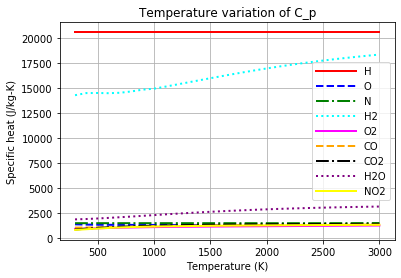

In [6]:
# define and initialize arrays for plotting
cp_H_mass   = np.zeros(nt)
cp_O_mass   = np.zeros(nt)
cp_N_mass   = np.zeros(nt)
cp_H2_mass  = np.zeros(nt)
cp_O2_mass  = np.zeros(nt)
cp_CO_mass  = np.zeros(nt)
cp_CO2_mass = np.zeros(nt)
cp_H2O_mass = np.zeros(nt)
cp_NO2_mass = np.zeros(nt)

# fill arrays
# the molar value is divided by the molecular weight to get the mass-specific value for each species
# here we retain the original energy units of J (versus kJ)
for i , T in enumerate(temp):
    gas1.TP        = T, None
    cp_H_mass[i]   = gas1.partial_molar_cp[gas1.species_index('H')]   / gas1.molecular_weights[gas1.species_index('H')  ]
    cp_O_mass[i]   = gas1.partial_molar_cp[gas1.species_index('O')]   / gas1.molecular_weights[gas1.species_index('O')  ]
    cp_N_mass[i]   = gas1.partial_molar_cp[gas1.species_index('N')]   / gas1.molecular_weights[gas1.species_index('N')  ]
    cp_H2_mass[i]  = gas1.partial_molar_cp[gas1.species_index('H2')]  / gas1.molecular_weights[gas1.species_index('H2') ]
    cp_O2_mass[i]  = gas1.partial_molar_cp[gas1.species_index('O2')]  / gas1.molecular_weights[gas1.species_index('O2') ]
    cp_CO_mass[i]  = gas1.partial_molar_cp[gas1.species_index('CO')]  / gas1.molecular_weights[gas1.species_index('CO') ]
    cp_CO2_mass[i] = gas1.partial_molar_cp[gas1.species_index('CO2')] / gas1.molecular_weights[gas1.species_index('CO2')]
    cp_H2O_mass[i] = gas1.partial_molar_cp[gas1.species_index('H2O')] / gas1.molecular_weights[gas1.species_index('H2O')]
    cp_NO2_mass[i] = gas1.partial_molar_cp[gas1.species_index('NO2')] / gas1.molecular_weights[gas1.species_index('NO2')]
    
# generate plot, and save a copy to the current working directory
fig, ax = plt.subplots()
ax.plot(temp,cp_H_mass,  label='H',  color="red",    ls='solid',  lw=2)
ax.plot(temp,cp_O_mass,  label='O',  color="blue",   ls='dashed', lw=2)
ax.plot(temp,cp_N_mass,  label='N',  color="green",  ls='dashdot',lw=2)
ax.plot(temp,cp_H2_mass, label='H2', color="cyan",   ls='dotted', lw=2)
ax.plot(temp,cp_O2_mass, label='O2', color="magenta",ls='solid',  lw=2)
ax.plot(temp,cp_CO_mass, label='CO', color="orange", ls='dashed', lw=2)
ax.plot(temp,cp_CO2_mass,label='CO2',color="black",  ls='dashdot',lw=2)
ax.plot(temp,cp_H2O_mass,label='H2O',color="purple", ls='dotted', lw=2)
ax.plot(temp,cp_NO2_mass,label='NO2',color="yellow", ls='solid',  lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Specific heat (J/kg-K)',
       title ='Temperature variation of C_p')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Cp-mass_vs_T_9species.png")

On a mass-specific basis, the specific heats of H and H2 are much higher than those of the other species. To see the behavior for the other molecules more clearly, we replot without H and H2: 

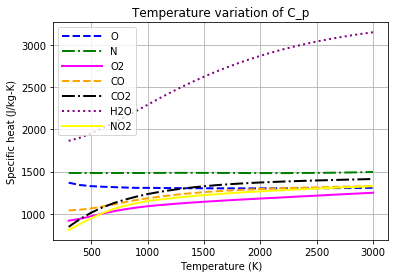

In [7]:
fig, ax = plt.subplots()
#ax.plot(temp,cp_H_mass,  label='H',  color="red",    ls='solid',  lw=2)
ax.plot(temp,cp_O_mass,  label='O',  color="blue",   ls='dashed', lw=2)
ax.plot(temp,cp_N_mass,  label='N',  color="green",  ls='dashdot',lw=2)
#ax.plot(temp,cp_H2_mass, label='H2', color="cyan",   ls='dotted', lw=2)
ax.plot(temp,cp_O2_mass, label='O2', color="magenta",ls='solid',  lw=2)
ax.plot(temp,cp_CO_mass, label='CO', color="orange", ls='dashed', lw=2)
ax.plot(temp,cp_CO2_mass,label='CO2',color="black",  ls='dashdot',lw=2)
ax.plot(temp,cp_H2O_mass,label='H2O',color="purple", ls='dotted', lw=2)
ax.plot(temp,cp_NO2_mass,label='NO2',color="yellow", ls='solid',  lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Specific heat (J/kg-K)',
       title ='Temperature variation of C_p')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Cp-mass_vs_T_7species.png")

On a per-unit-mass basis, the spread in the numerical values of specific heats is significantly smaller than on a per-unit-mole basis, with the exceptions of H, H2, and H2O.

An alternative to performing the division of the species molar specific heat by the species molecular weight for each species of interest is to define an array that holds the mass-based specific heats for all species, and to compute them using a single command:

In [8]:
# define an array that contains the mass-based constant-pressure species specifics heats (J/kg-K), and compute them
#   for the current temperature of gas1
partial_molar_cp_mass = gas1.partial_molar_cp / gas1.molecular_weights

# print the mass-based constant-pressure species specifics heats (J/kg-K)
partial_molar_cp_mass

array([18386.77330688, 20622.41327742,  1308.56342361,  1249.91612462,
        2177.06658256,  3152.37980942,  1824.86355793,  2314.18425257,
        1800.24948825,  3186.12099726,  3951.89028846,  3962.0625382 ,
        5209.75573403,  6957.19881051,  1328.40133348,  1412.69002924,
        1968.10233428,  2650.35086679,  3180.90486301,  3326.559306  ,
        3791.18986192,  2544.89520405,  3311.4167241 ,  3802.48555647,
        4488.1237409 ,  5005.46006828,  5609.83514941,  1965.70044554,
        2470.30501743,  2557.35113835,  1496.23104789,  2558.21039333,
        3689.37871227,  4641.72099235,  1947.12132172,  1252.46117447,
        1328.30393364,  1436.84152718,  2125.73324251,  1615.02464072,
        2266.18235474,  2846.24582192,  1975.44446178,  1894.18832276,
        1793.30244961,  1878.29487654,  1464.50236563,  1321.79821501,
         520.33031065,  4958.20970428,  5378.94885163,  2878.43179182,
        3336.35191749])

Here we have taken advantage of a feature of NumPy. In an expression involving arrays that have the same size and shape, the specified mathematical operation (here, division) is performed for each element of the arrays, and the result is an array having the same size and shape as those of the arrays on which the operation was performed. This also works for addition, subtraction, and multiplication.

To confirm that the result is the same as before, we regenerate the figure:

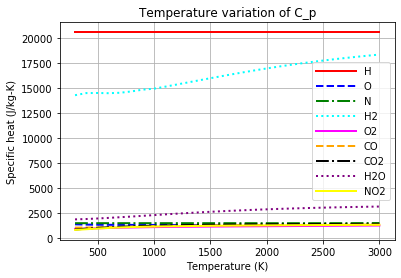

In [9]:
# fill arrays
for i , T in enumerate(temp):
    gas1.TP        = T, None
    partial_molar_cp_mass = gas1.partial_molar_cp / gas1.molecular_weights
    cp_H_mass[i]   = partial_molar_cp_mass[gas1.species_index('H')]
    cp_O_mass[i]   = partial_molar_cp_mass[gas1.species_index('O')]
    cp_N_mass[i]   = partial_molar_cp_mass[gas1.species_index('N')]
    cp_H2_mass[i]  = partial_molar_cp_mass[gas1.species_index('H2')] 
    cp_O2_mass[i]  = partial_molar_cp_mass[gas1.species_index('O2')] 
    cp_CO_mass[i]  = partial_molar_cp_mass[gas1.species_index('CO')]
    cp_CO2_mass[i] = partial_molar_cp_mass[gas1.species_index('CO2')]
    cp_H2O_mass[i] = partial_molar_cp_mass[gas1.species_index('H2O')]
    cp_NO2_mass[i] = partial_molar_cp_mass[gas1.species_index('NO2')]
    
# generate plot, and save a copy to the current working directory
fig, ax = plt.subplots()
ax.plot(temp,cp_H_mass,  label='H',  color="red",    ls='solid',  lw=2)
ax.plot(temp,cp_O_mass,  label='O',  color="blue",   ls='dashed', lw=2)
ax.plot(temp,cp_N_mass,  label='N',  color="green",  ls='dashdot',lw=2)
ax.plot(temp,cp_H2_mass, label='H2', color="cyan",   ls='dotted', lw=2)
ax.plot(temp,cp_O2_mass, label='O2', color="magenta",ls='solid',  lw=2)
ax.plot(temp,cp_CO_mass, label='CO', color="orange", ls='dashed', lw=2)
ax.plot(temp,cp_CO2_mass,label='CO2',color="black",  ls='dashdot',lw=2)
ax.plot(temp,cp_H2O_mass,label='H2O',color="purple", ls='dotted', lw=2)
ax.plot(temp,cp_NO2_mass,label='NO2',color="yellow", ls='solid',  lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Specific heat (J/kg-K)',
       title ='Temperature variation of C_p')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Cp-mass_vs_T_9species.png")

This is identical to the earlier figure.

### 2.3 Constant-pressure specific heats of larger molecules as functions of temperature

As we saw in Section 2.1 above, the value of the molar constant-pressure species specific heat generally increases with increasing temperature and with increasing number of internal degrees of freedom in the molecule. The number of internal degrees of freedom, in turn, generally increases with the number of atoms in the molecule. We could manually count the number of atoms in each molecule (or species) in gas1 to determine which species are likely to have the highest specific heats, but it will be more informative in terms of learning to use Cantera to use the available attributes of gas1 for that purpose. Here we use `n_atoms()`, which we have seen before.

In [10]:
# define an array to hold the number of atoms in each molecule (or species), and initialize all values to zero
n_atoms_in_species = np.zeros(gas1.n_species)

# compute the number of atoms in each molecule (or species)
for i in range (gas1.n_species):      # loop over species (molecules) in gas1
    for j in range (gas1.n_elements): # for each species, loop over elements in gas1
        n_atoms_in_species[i] += gas1.n_atoms(gas1.species_names[i],gas1.element_names[j]) # increment the atom count
        
# print the number of atoms in each species (or molecule)
n_atoms_in_species

array([ 2.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  1.,  2.,  3.,  3.,  4.,
        5.,  2.,  3.,  3.,  4.,  5.,  5.,  6.,  3.,  4.,  5.,  6.,  7.,
        8.,  4.,  5.,  5.,  1.,  2.,  3.,  4.,  3.,  2.,  3.,  3.,  3.,
        2.,  3.,  4.,  4.,  4.,  4.,  4.,  3.,  2.,  1., 10., 11.,  6.,
        7.])

Now let's order the species by the number of atoms in each species. We use the NumPy function [`argsort()`](https://www.numpy.org/devdocs/reference/generated/numpy.argsort.html) for this purpose. This function does not change the original array. Rather, it returns an index array that can be used to access the elements of the original array in sorted order, from smallest to largest values of the elements in the array.

In [11]:
# compute an index array that can be used to access the species in an order based on the number of atoms in each species,
#   from smallest to largest
sort_index = np.argsort(n_atoms_in_species)

# print the index array
sort_index

array([ 1,  2, 30, 48,  8,  0, 39, 35, 31, 14, 47,  4,  9,  3, 11, 36, 34,
       32,  5,  6, 10, 40, 37, 38, 21, 16, 15, 46, 22,  7, 27, 42, 43, 44,
       17, 33, 45, 12, 41, 29, 19, 18, 13, 28, 23, 51, 24, 20, 52, 25, 26,
       49, 50], dtype=int64)

The examples that follow show how to use the index array. 

In [12]:
# access the elements of n_atoms_in_species in the order given by the index array
n_atoms_in_species[sort_index]

array([ 1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,  8., 10.,
       11.])

There are five species that consisist of a single atom, nine that contain two atoms, etc., and a single species that contains 11 atoms.

To see this more clearly:

In [13]:
# print the species indices, species names, and numbers of atoms in each species, in order from the species
#   having the fewest atoms to the species having the most atoms
for i in sort_index: # in each pass through this "for" loop, the value of i is taken from the sort_index array
   print(' {:4d} {:10s} {:1f}'.format(i,gas1.species_names[i],n_atoms_in_species[i]) )

    1 H          1.000000
    2 O          1.000000
   30 N          1.000000
   48 AR         1.000000
    8 C          1.000000
    0 H2         2.000000
   39 CN         2.000000
   35 NO         2.000000
   31 NH         2.000000
   14 CO         2.000000
   47 N2         2.000000
    4 OH         2.000000
    9 CH         2.000000
    3 O2         2.000000
   11 CH2(S)     3.000000
   36 NO2        3.000000
   34 NNH        3.000000
   32 NH2        3.000000
    5 H2O        3.000000
    6 HO2        3.000000
   10 CH2        3.000000
   40 HCN        3.000000
   37 N2O        3.000000
   38 HNO        3.000000
   21 C2H        3.000000
   16 HCO        3.000000
   15 CO2        3.000000
   46 NCO        3.000000
   22 C2H2       4.000000
    7 H2O2       4.000000
   27 HCCO       4.000000
   42 HCNN       4.000000
   43 HCNO       4.000000
   44 HOCN       4.000000
   17 CH2O       4.000000
   33 NH3        4.000000
   45 HNCO       4.000000
   12 CH3        4.000000
   41 H2CN  

Note that in case of "ties" (molecules having the same number of atoms), the ordering appears to be arbitrary. In fact, it is determined internally by the algorithm used by `argsort()`.

Let's look at the specific heats for the five species having the largest numbers of atoms:

   52 CH3CHO     7.000000
   25 C2H5       7.000000
   26 C2H6       8.000000
   49 C3H7       10.000000
   50 C3H8       11.000000


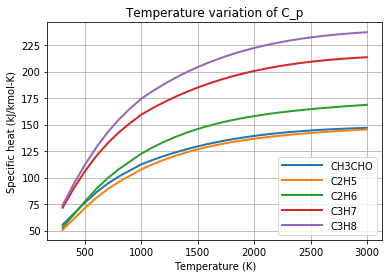

In [14]:
# define an array to hold species i specific heat versus temperature, and initialize to zero
cp_species_i = np.zeros(nt)

# start a new figure
fig, ax = plt.subplots()

# loop over the five species that contain the largest numbers of atoms
for i in (sort_index[gas1.n_species-5],sort_index[gas1.n_species-4],sort_index[gas1.n_species-3],
          sort_index[gas1.n_species-2],sort_index[gas1.n_species-1]):
    print(' {:4d} {:10s} {:1f}'.format(i,gas1.species_names[i],n_atoms_in_species[i]) ) # print to verify result

# compute the species i constant-pressure specific heat (kJ/kmol-K) as a function of temperature
# we used i for the species index, so will use k here for the temperature index
# divide by 1000 to give values in kJ/kmol-K, rather than J/kmol-K
    for k , T in enumerate(temp):
        gas1.TP         = T, None
        cp_species_i[k] = gas1.partial_molar_cp[i] / 1000.

# add species i line to the plot
    ax.plot(temp,cp_species_i,label=gas1.species_names[i], lw=2)
    
# this is the end of the i loop

# finish up the figure
ax.set(xlabel='Temperature (K)',
       ylabel='Specific heat (kJ/kmol-K)',
       title ='Temperature variation of C_p')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Cp_vs_T_high-dof_species.png")

The results are consistent with the expectation that the value of $\overline c_p$ (on a molar-specific basis) should increase with increasing number of internal degrees of freedom in the molecule (as suggested by the number of atoms in the molecule) and with increasing temperature. More internal degrees of freedom are activated with increasing temperature. The increase in $\overline c_p$ with increasing temperature is larger for these molecules that have more internal degrees of freedom, compared to the molecules considered in Section 2.1 above.

### 2.4 Relationships

Individual species constant-pressure specific heat values are accessible using the attribute `partial_molar_cp` (J/kmol-K), as has been seen above. It is again emphasized that these values depend only on the current temperature of the gas mixture: not on the mixture pressure or composition. 

For an ideal gas, the following relationships can be derived among the constant-pressure specific heat $ c_p$ (J/kg-K) or $\overline c_p$ (J/kmol-K), the constant-volume specific heat $c_v$ (J/kg-K) or $\overline c_v$ (J/kmol-K), the gas constant $R$ (J/kg-K) or $R_u$ (J/kmol-K), and the molecular weight $MW$ (kg/kmol). It is also useful in some situations to introduce the ratio of the specific heats, which is denoted here as $ \gamma $: $ \gamma \equiv c_p / c_v = \overline c_p / \overline c_v $. These relationships apply both to individual species values and to appropriately defined mixture-averaged values in gas mixtures:

$$ \overline c_p - \overline c_v = R_u \ , \ c_p - c_v = R \ \ ( R = R_u / MW ) $$

It is important to note that, while the specific heats vary with temperature, their difference is a constant value that depends only on the particular gas-phase species or mixture that is being considered (in the case of mass-specific values) or that is independent of the particular gas-phase species or mixture that is being considered (in the case of molar values). 

From this, the following relationships can be derived:

$$ c_p = \gamma R / ( \gamma - 1 ) \ , \ \overline c_p = \gamma R_u / ( \gamma - 1 ) \ , \ c_v = R / ( \gamma - 1 ) \ , \ \overline c_v = R_u / ( \gamma - 1 ) $$

Finally, we note that $R_u$ is a physical constant (the universal gas constant, or the molar gas constant), and is one of the physical constants whose value can be accessed directly in Cantera (using [`gas_constant`](https://cantera.org/documentation/docs-2.4/doxygen/html/db/d22/group__physConstants.html)):

In [15]:
# report the value of the universal (molar) gas constant used internally in Cantera
# the units are J/kmol-K
ct.gas_constant

8314.4621

## 3. Mixture specific heats

First, let's reset the gas1 mixture state to correspond to a mixture of C3H8, O2, and N2 in molar proportions 1.0:5.0:18.8, at ambient pressure and temperature. As we will see later, this corresponds to a stoichiometric mixture of propane and air, making our usual approximation that air is a mixture of 21% O2 and 79% N2 on a volume (or molar) basis.

In [16]:
# set the temperature, pressure, and composition of gas1 to correspond to a stoichiometric propane-air mixture
#  at 300 K and 1 atm
gas1.TPX = 300. , ct.one_atm , 'C3H8:1.0 O2:5.0 N2:18.8'

# print the full thermochemical state of gas1
gas1()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.19695  kg/m^3
  mean mol. weight         29.4655  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.4014e+05       -4.129e+06     J
   internal energy     -2.2479e+05       -6.624e+06     J
           entropy          6893.9        2.031e+05     J/K
    Gibbs function     -2.2083e+06       -6.507e+07     J
 heat capacity c_p          1050.3        3.095e+04     J/K
 heat capacity c_v          768.14        2.263e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.201613         0.218947         -26.2751
                N2       0.758065         0.720709         -23.3101
              C3H8      0.0403226        0.0603447         -77.3418
     [  +50 minor]        

Specific-heat-related attributes of gas1 that are relevant for gas mixtures are [`cp`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.cp), [`cp_mass`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.cp_mass), [`cp_mole`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.cp_mole), [`cv`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.cv), [`cv_mass`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.cv_mass), and [`cv_mole`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.cv_mole). Let's see what each of these mixture-specific-heat attributes does:

In [17]:
# get help for attribute "cp"
help(gas1.__class__.cp)

Help on getset descriptor cantera._cantera.ThermoPhase.cp:

cp
    Heat capacity at constant pressure [J/kg/K or J/kmol/K] depending
    on `basis`.



So, the value reported by `cp` depends on the current value of [`basis`](https://cantera.org/documentation/docs-2.4/sphinx/html/cython/thermo.html#cantera.ThermoPhase.basis):

In [18]:
# report the current basis (mass or molar)
gas1.basis

'mass'

The default basis is "mass".

In [19]:
# get help for attribute "cp_mass"
help(gas1.__class__.cp_mass)

Help on getset descriptor cantera._cantera.ThermoPhase.cp_mass:

cp_mass
    Specific heat capacity at constant pressure [J/kg/K].



In [20]:
# get help for attribute "cp_mole"
help(gas1.__class__.cp_mole)

Help on getset descriptor cantera._cantera.ThermoPhase.cp_mole:

cp_mole
    Molar heat capacity at constant pressure [J/kmol/K].



Since the basis is currently set to "mass", the values reported by `cp` and by `cp_mass` should be identical:

In [21]:
gas1.cp , gas1.cp_mass , gas1.cp_mole

(1050.3123623618103, 1050.3123623618103, 30947.959600976872)

This confirms the expectation. Moreover, it can be confirmed that the mass-specific and molar values of the mixture constant-pressure specific heat are consistent with the mixture-averaged values reported above for gas1.

The attributes `cv`, `cv_mass`, and `cv_mole` report similar information for the constant-volume mixture specific heat.

In [22]:
gas1.cv , gas1.cv_mass , gas1.cv_mole

(768.1360107504721, 768.1360107504721, 22633.49750097687)

Again, the values of `cv` and `cv_mass` are the same because `basis` is currently set to "mass", and the mass-specific and molar values of the mixture constant-volume specific heat are consistent with the mixture values reported above for gas1.

As we will see, *complete combustion* of this mixture of propane and air will result in a mixture of CO2, H2O, and N2 in  molar proportions 3.0:4.0:18.8. The corresponding global reaction can be written as:

$$ C_3H_8 + 5 ( O_2 + 3.76 N_2 ) \rightarrow 3 CO_2 + 4 H_2O + 18.8 N_2 $$

Here we have written the air in the fuel-air reactants on the left-hand side as $ O_2 + 3.76 N_2 $, which is consistent with our usual approximation for air as being 21% O2 and 79% N2 on a molar basis (79/21 = 3.76, to three significant figures). Note that the numbers of carbon, hydrogen, oxygen, and nitrogen atoms are the same on the left-hand side and on the right-hand side of the global reaction: chemical reactions do not create or destroy elements, they only rearrange them from one set of molecular structures to a different set of molecular structures. The number of molecules, or moles, is not conserved; there are 24.8 moles of fuel-air reactants on the left-hand side, and 25.8 moles of products on the right-hand side: chemical reactions do not (necessarily) conserve molecules or moles. The mass of the reactants is equal to the mass of the products, as can easily be verified by working with the corresponding molecular weights: mass is conserved in chemical reactions. We will come back to these points later, when we discuss stoichiometry and chemical reactions.

For now, let's look at the specific heats of the reactants and of the products. Recall that currently, our gas mixture is a mixture of propane and air at 300 K and 1 atm.

In [23]:
# save the reactant mixture specific heats
cp_reac = gas1.cp # J/kg-K
cv_reac = gas1.cv # J/kg-K

# save the reactant mixture ratio of specific heats
gamma_reac = cp_reac / cv_reac

# compute the reactant mixture gas constant
R_reac = ct.gas_constant / gas1.mean_molecular_weight # J/kg-K

# confirm that the relationships among c_p, c_v, and R are satisfied
cp_reac , cv_reac , gamma_reac , R_reac , cp_reac-cv_reac , gamma_reac*R_reac/(gamma_reac-1.) , R_reac/(gamma_reac-1.)

(1050.3123623618103,
 768.1360107504721,
 1.3673520674231256,
 282.1763516113382,
 282.1763516113382,
 1050.3123623618103,
 768.1360107504721)

The expected relationships are satisfied. Note that the value of gamma for the reactants is slightly lower than 1.4, the value that would be expected for a diatomic gas. That is because of the relatively small amount of C3H8 in the reactant mixture, compared to O2 and (especially) N2.

Now let's consider the products. As we will see later, the product temperature for complete combustion of the current reactant mixture will typically be approximately 2200 K. Moreover, there will be more than the three species considered here in the products. For now, we will assume that the products include only the three species CO2, H2O, and N2 and that the product temperature and pressure are 2200 K and 1 atm, respectively:

In [24]:
# set the temperature, pressure, and composition of gas1 to correspond to products of complete combustion
gas1.TPX = 2200. , None , "CO2:3.0 H2O:4.0 N2:18.8"

# print the full thermochemical state of gas1
gas1()


  gri30:

       temperature            2200  K
          pressure          101325  Pa
           density        0.156894  kg/m^3
  mean mol. weight         28.3234  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -4.2669e+05       -1.209e+07     J
   internal energy     -1.0725e+06       -3.038e+07     J
           entropy          9568.4         2.71e+05     J/K
    Gibbs function     -2.1477e+07       -6.083e+08     J
 heat capacity c_p          1474.5        4.176e+04     J/K
 heat capacity c_v          1180.9        3.345e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
               H2O       0.155039        0.0986134         -42.9813
               CO2       0.116279         0.180678         -55.8954
                N2       0.728682         0.720709         -27.5738
     [  +50 minor]        

In [25]:
# save the product mixture specific heats
cp_prod = gas1.cp # J/kg-K
cv_prod = gas1.cv # J/kg-K

# save the product mixture ratio of specific heats
gamma_prod = cp_prod / cv_prod

# compute the product mixture gas constant
R_prod = ct.gas_constant / gas1.mean_molecular_weight # J/kg-K

# confirm that the relationships among c_p, c_v, and R are satisfied
cp_prod , cv_prod , gamma_prod , R_prod , cp_prod-cv_prod , gamma_prod*R_prod/(gamma_prod-1.) , R_prod/(gamma_prod-1.)

(1474.4534480635677,
 1180.8990177582239,
 1.248585548714078,
 293.5544303053437,
 293.5544303053439,
 1474.453448063567,
 1180.8990177582234)

Again, the relationships among c_p, c_v, R, and gamma are confirmed for the product mixture. Note that the value of gamma is lower for the products than it was for the reactants.

Finally, let's plot the temperature dependence of the constant-pressure specific heat of the reactant mixture and of the product mixture:

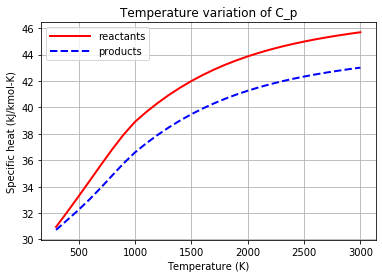

In [26]:
# define arrays to hold the reactant mixture and product mixture specific heats
cp_reac = np.zeros(nt)
cp_prod = np.zeros(nt)

# loop over temperatures
# note that the mixture specific heat depends only on the mixture temperature and the mixture composition
for i , T in enumerate(temp):
    
# reactants
    gas1.TPX   = T, ct.one_atm, 'C3H8:1.0 O2:5.0 N2:18.8'
    cp_reac[i] = gas1.cp_mole / 1000. # convert to kJ/kmol-K
    
# products
    gas1.TPX   = T, ct.one_atm, 'CO2:3.0 H2O:4.0 N2:18.8'
    cp_prod[i] = gas1.cp_mole / 1000. # convert to kJ/kmol-K
    
# generate plot
fig, ax = plt.subplots()
ax.plot(temp,cp_reac,  label='reactants',  color="red",    ls='solid',  lw=2)
ax.plot(temp,cp_prod,  label='products',   color="blue",   ls='dashed', lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Specific heat (kJ/kmol-K)',
       title ='Temperature variation of C_p')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Cp_vs_T_reac-prod.png")

Repeat on a mass-specific basis:

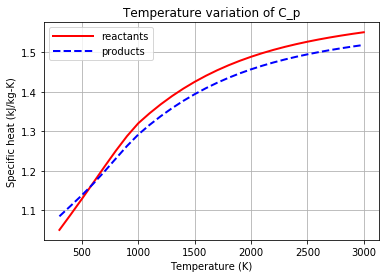

In [27]:
# loop over temperatures
# note that the mixture specific heat depends only on the mixture temperature and the mixture composition
for i , T in enumerate(temp):
    
# reactants
    gas1.TPX   = T, ct.one_atm, 'C3H8:1.0 O2:5.0 N2:18.8'
    cp_reac[i] = gas1.cp_mass / 1000. # convert to kJ/kg-K
    
# products
    gas1.TPX   = T, ct.one_atm, 'CO2:3.0 H2O:4.0 N2:18.8'
    cp_prod[i] = gas1.cp_mass / 1000. # convert to kJ/kg-K

# generate plot
fig, ax = plt.subplots()
ax.plot(temp,cp_reac,  label='reactants',  color="red",    ls='solid',  lw=2)
ax.plot(temp,cp_prod,  label='products',   color="blue",   ls='dashed', lw=2)
ax.set(xlabel='Temperature (K)',
       ylabel='Specific heat (kJ/kg-K)',
       title ='Temperature variation of C_p')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("Cp_vs_T_mass_reac-prod.png")

With the exception of the lowest temperatures, the reactant mixture specific heat is higher than the product mixture specific heat on both per-unit-mass and per-unit-mole bases. The difference is greater on a molar basis.  

## 4. Sources for thermodynamic property data

The single most definitive and up-to-date source for thermodynamic property data for a large number of species of interest in combustion is probably the [NIST Chemistry WebBook](https://webbook.nist.gov/).

As we have discussed, in Cantera and other combustion software, individual species thermodynamic property data are usually specified in the form of polynomial functions of temperature. The format that is usually adopted is described in Table A.13 of Turns 4th ed. Ideally, the polynomial curve fits should be consistent with the latest available property data. In practice, and as noted in the previous tutorial Notebook, the values of the polynomial coefficients, and the temperature range over which they are intended to be used, can vary from one source to another. This generally will not be an issue in our introductory study of combustion, as long as we limit our use of the property data to the temperature range for which it was intended. 

In subsequent tutorial Notebooks, we will use the thermodynamic property data that are provided in a given .cti input file for the problem at hand. The structure of these files will be discussed in a later tutorial Notebook, after we have introduced the subjects of chemical kinetics and chemical mechanisms in Chapters 4 and 5.  